***myself ADITYA JHA, i build a regression Model,which predicts the price of cars, in this project i use PANDAS for importing the file & doing EDA, SWEETVIZ library to select the best features which are contributing to label column, KFold cross validation for split our data into training & testing part and finally developed the ML model & made a predictive system.***

# importing required libraries:-

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score  

### importing files

In [74]:
data=pd.read_csv('c:/new/car data.csv') 
data.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


### start doing EDA

In [69]:
data.shape

(301, 9)

In [70]:
data.isna().sum()                 # check the null values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

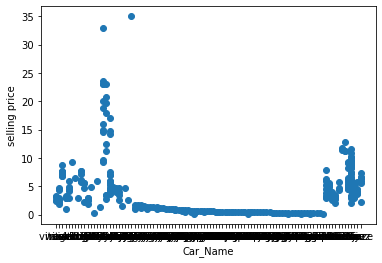

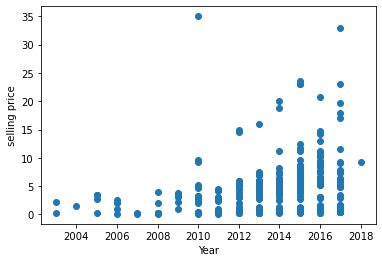

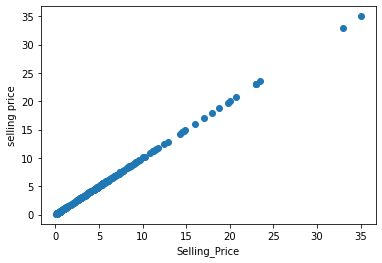

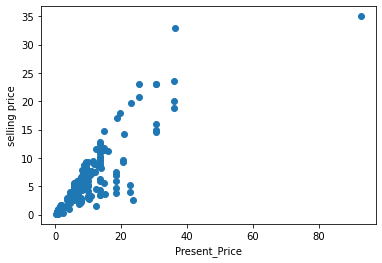

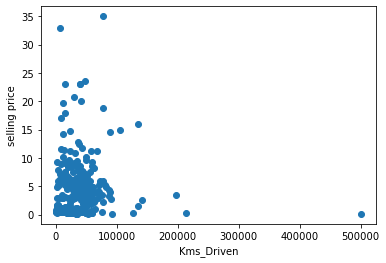

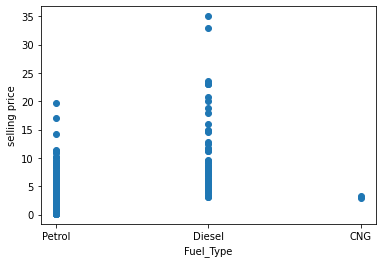

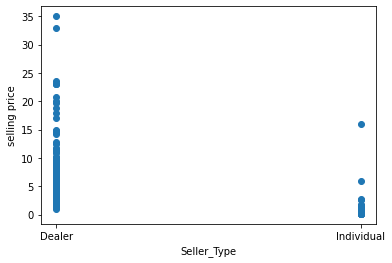

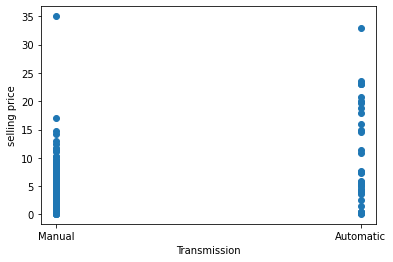

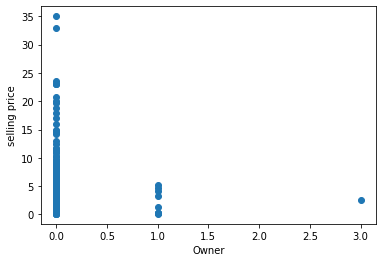

In [71]:
                                #   understanding data pattern by vissuals
for i in data.columns:                      
    plt.scatter(data[i],data['Selling_Price'])
    plt.xlabel(i)
    plt.ylabel('selling price')
    plt.show()

## apply label encoder to encode the data

In [76]:
from sklearn.preprocessing import LabelEncoder
tr=LabelEncoder()
sell=LabelEncoder()
fuel=LabelEncoder()
data['Transmission']=tr.fit_transform(data['Transmission'])       # change categorical to numerical 
data['Seller_Type']=sell.fit_transform(data['Seller_Type'])
data['Fuel_Type']=fuel.fit_transform(data['Fuel_Type'])


### separate the data into feature & label, and drop unwanted column

In [77]:
x=data.drop(['Car_Name','Selling_Price'],axis=1)
y=data.iloc[:,2:3]                                 # divide into feature & lable

In [78]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.1) # split the data into training and testing part

# MODEL Building:-- 

In [79]:
model=Lasso()
model.fit(xtrain,ytrain)
model.score(xtrain,ytrain)    # check the training score

0.8394445682888744

In [80]:
ypred=model.predict(xtest)
r2_score(ytest,ypred)

0.8872296827473163

### visualise the accuracy:-

Text(0, 0.5, 'predicted')

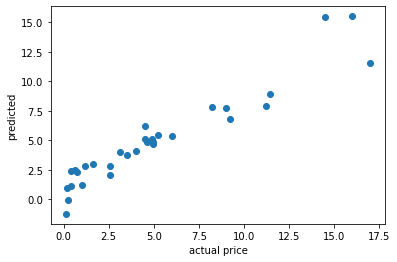

In [81]:
plt.scatter(ytest,ypred)
plt.xlabel('actual price')
plt.ylabel('predicted')

# buiding a predictive system :-

In [84]:
model.predict(np.array([int(input('enter the year:-')),int(input('enter the present price:-')),int(input('enter the km driven:-')),
                        fuel.transform([input('fuel type PETROL/Deisel:-')]),
                        sell.transform([input('seller type:-')]),tr.transform([input('transmission:-')]),int(input('owners:-'))]).reshape(1,-1))

enter the year:-2014
enter the present price:-6
enter the km driven:-111
fuel type PETROL/Deisel:-Petrol
seller type:-Dealer
transmission:-Manual
owners:-1


<ipython-input-84-6dc93a27a14c>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  model.predict(np.array([int(input('enter the year:-')),int(input('enter the present price:-')),int(input('enter the km driven:-')),


array([4.18317426])